# Лабораторна робота №1
## Метрики якості задач класифікації
__Виконали студенти групи ІА-01: Гнітій Є.О., Дронь О.В., Телесненко І.М.__


## 1) Завантаження файлу bioresponse.csv

In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv("bioresponse.csv")
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB
None


In [46]:
df["Activity"].value_counts()

1    2034
0    1717
Name: Activity, dtype: int64

## 2) Навчання класифікатора, щоб передбачити поле "Activity" з набору даних "bioresponse.csv" і 3) Розрахунок метрик, щоб перевірити якість наших моделей

### 1) дрібне дерево рішень

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Завантажуємо дані
data = pd.read_csv("bioresponse.csv")

# Розділяємо дані на навчальний і тестовий набори
X = data.drop("Activity", axis=1)
y = data["Activity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створимо та вчимо модель
clf = DecisionTreeClassifier(max_depth=5, random_state=42) # Дрібне дерево з глибиною 5
clf.fit(X_train, y_train)

# Передбачення на тестовому наборі
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)  # потрібно для log-loss

# Обчислення метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Log Loss: {loss:.2f}")

Accuracy: 77.63%
Precision: 0.79
Recall: 0.83
F1 Score: 0.81
Log Loss: 0.62


### 2) глибоке дерево рішень;

In [48]:
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("bioresponse.csv")

X = data.drop("Activity", axis=1)
y = data["Activity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42) # Глибоке дерево без обмеження глибини
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)  # потрібно для log-loss

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Log Loss: {loss:.2f}")

Accuracy: 69.91%
Precision: 0.75
Recall: 0.72
F1 Score: 0.73
Log Loss: 10.39


### 3) випадковий ліс на дрібних деревах;

In [49]:
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("bioresponse.csv")

X = data.drop("Activity", axis=1)
y = data["Activity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Використання 100 дрібних дерев з максимальною глибиною 5
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)  # потрібно для log-loss

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Log Loss: {loss:.2f}")

Accuracy: 76.03%
Precision: 0.81
Recall: 0.76
F1 Score: 0.79
Log Loss: 0.55


### 4) випадковий ліс на глибоких деревах

In [50]:
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("bioresponse.csv")

X = data.drop("Activity", axis=1)
y = data["Activity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Використання 100 глибоких дерев без обмеження глибини
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)  # потрібно для log-loss

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Log Loss: {loss:.2f}")

Accuracy: 80.03%
Precision: 0.82
Recall: 0.83
F1 Score: 0.83
Log Loss: 0.45


### 4) Побудова precision-recall і ROC-кривих для наших моделей

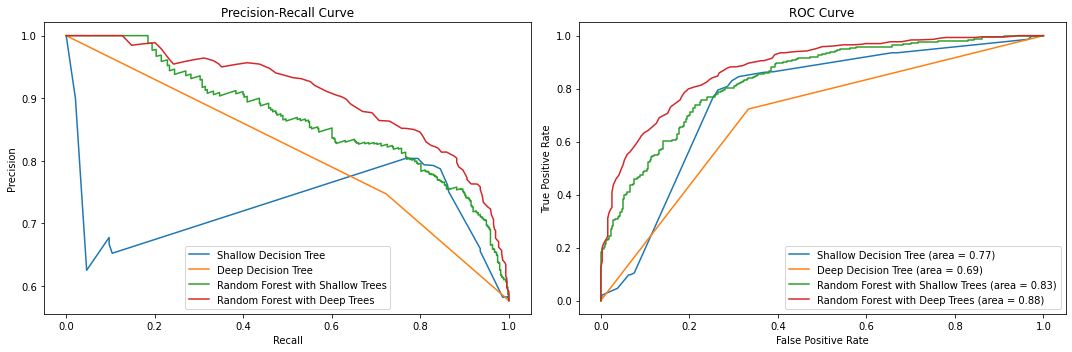

In [51]:
data = pd.read_csv("bioresponse.csv")

# Розділення набору даних на ознаки (X) та цільовий стовпець (y)
X = data.drop("Activity", axis=1)
y = data["Activity"]

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення словника з моделями для порівняння
models = {
    "Shallow Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Deep Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest with Shallow Trees": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "Random Forest with Deep Trees": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Ініціалізація полотна для малюнків
plt.figure(figsize=(15, 5))

# Побудова Precision-Recall кривої
plt.subplot(1, 2, 1)
# Ітерація по моделях, збережених у словнику 'models'
for model_name, model in models.items():
    # Навчання поточної моделі на навчальних даних
    model.fit(X_train, y_train)
    # Передбачення ймовірностей для тестового набору за допомогою поточної моделі
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Розрахунок точності (precision) і повноти (recall) для різних порогових значень
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    # Побудова графіка Precision-Recall для поточної моделі
    plt.plot(recall, precision, label=model_name)


# Налаштування осей та легенди для Precision-Recall кривої
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

# Побудова ROC кривої
plt.subplot(1, 2, 2)
# Ітерація по моделям, збережених у словнику 'models'
for model_name, model in models.items():
    # Передбачення ймовірностей для тестового набору за допомогою поточної моделі
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Розрахунок значень False Positive Rate (fpr) та True Positive Rate (tpr) для різних порогових значень
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    # Розрахунок площі під ROC-кривою (AUC - Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    # Побудова ROC-кривої для поточної моделі, додавання до кривої мітки з ім'ям моделі та значенням AUC
    plt.plot(fpr, tpr, label=f"{model_name} (area = {roc_auc:.2f})")


# Налаштування осей та легенди для ROC кривої
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()

# Відображення обох графіків
plt.show()

### 5) Навчання класифікатора, який уникає помилок II роду і розрахунок для нього метрики якості

In [52]:
# Завантаження набору даних із файлу "bioresponse.csv"
data = pd.read_csv("bioresponse.csv")

# Розділяємо набір даних на ознаки та цільовий стовпець
# 'Activity' - це цільовий стовпець, який ми хочемо передбачити
X = data.drop("Activity", axis=1)  # Отримання усіх ознак без 'Activity'
y = data["Activity"]  # Цільовий стовпець

# Розділяємо даних на навчальний та тестовий набори
# 20% даних використовуються як тестовий набір
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ініціалізація класифікатора випадкового лісу з 100 деревами
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Навчаємо модель на навчальних даних
clf.fit(X_train, y_train)

# Передбачаємо ймовірності належності до позитивного класу для тестового набору
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Визначаємо поріг класифікації, щоб уникнути помилок II роду.
# В цьому прикладі обрано поріг 0.2
threshold = 0.2
y_pred = (y_pred_proba >= threshold).astype(int)

# Розрахунок ключових метрик для оцінки якості моделі:
accuracy = accuracy_score(y_test, y_pred)  # Доля правильних передбачень
precision = precision_score(y_test, y_pred)  # Точність передбачень
recall = recall_score(y_test, y_pred)  # Повнота передбачень
f1 = f1_score(y_test, y_pred)  # Середнє гармонічне точності та повноти
loss = log_loss(y_test, y_pred_proba)  # Втрати логарифмічної функції

# Виводимо метрики для аналізу якості моделі
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Log Loss: {loss:.2f}")

Accuracy: 0.67
Precision: 0.64
Recall (Sensitivity): 0.99
F1 Score: 0.78
Log Loss: 0.45
